<a href="https://colab.research.google.com/github/kaiquefreire05/time-series-with-facebook-prophet/blob/main/time_series_with_facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Série temporal com Facebook Prophet - previsão de visualizações diárias de páginas web

## Instalação da biblioteca e importação da base de dados

- Visualizações diárias de uma página web da Wikipedia: https://en.wikipedia.org/wiki/Peyton_Manning

In [20]:
# Instalando o Facebook Prophet

!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.3 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.2-py3-none-any.w

In [21]:
# Importando as bibliotecas

from prophet import Prophet
import pandas as pd

In [22]:
# Fazendo a leitura da base de dados

dataset = pd.read_csv('/content/drive/MyDrive/datasets/page_wikipedia.csv')
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [23]:
# Descrição da base de dados

dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


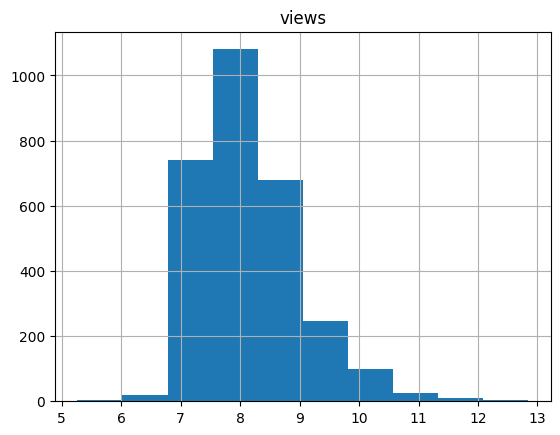

In [24]:
# Gerando histograma para visualizar a concetração máximo de views na página

dataset.hist();

In [25]:
# Renomeando as colunas da base de dados

dataset = dataset[['date', 'views']].rename(columns = {'date': 'ds', 'views': 'y'})
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [26]:
# Ordenando a base de dados por data

dataset = dataset.sort_values(by = 'ds')
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Construção do modelo e previsões

In [27]:
# Criando modelo e treinando

model = Prophet()
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxvx58723/87hqz7b3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxvx58723/_wk5ydep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49153', 'data', 'file=/tmp/tmpxvx58723/87hqz7b3.json', 'init=/tmp/tmpxvx58723/_wk5ydep.json', 'output', 'file=/tmp/tmpxvx58723/prophet_modelio316kw3/prophet_model-20240216213841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:38:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
# Prevendo para o futuro no período de 90 dias

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future) # armazenando previsões na variável

In [29]:
# 5 primeiros registros

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.273737,9.468847,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,7.948693,9.210581,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.779027,9.046048,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.721458,9.041217,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.734995,9.012901,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874


In [30]:
# Tamanho da base original e da base com previsões

len(dataset), len(forecast)

(2905, 2995)

In [31]:
# Verificando se foi realmente 90 dias

len(forecast) - len(dataset)

90

In [32]:
# Valores previstos no final da base de dados

forecast.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2905,2016-01-21,7.559905,7.955773,9.169153,7.559905,7.559905,0.999855,0.999855,0.999855,-0.072254,-0.072254,-0.072254,1.072109,1.072109,1.072109,0.0,0.0,0.0,8.559760
2906,2016-01-22,7.558883,7.924129,9.160103,7.558883,7.558883,1.016860,1.016860,1.016860,-0.069575,-0.069575,-0.069575,1.086435,1.086435,1.086435,0.0,0.0,0.0,8.575743
2907,2016-01-23,7.557862,7.746189,8.996109,7.557862,7.557862,0.786590,0.786590,0.786590,-0.311713,-0.311713,-0.311713,1.098303,1.098303,1.098303,0.0,0.0,0.0,8.344452
2908,2016-01-24,7.556840,8.090273,9.320138,7.556840,7.556840,1.155604,1.155604,1.155604,0.048287,0.048287,0.048287,1.107318,1.107318,1.107318,0.0,0.0,0.0,8.712445
2909,2016-01-25,7.555819,8.438628,9.637321,7.555819,7.555819,1.465356,1.465356,1.465356,0.352288,0.352288,0.352288,1.113068,1.113068,1.113068,0.0,0.0,0.0,9.021175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.473079,6.309035,7.543465,7.446500,7.501538,-0.560878,-0.560878,-0.560878,-0.069575,-0.069575,-0.069575,-0.491303,-0.491303,-0.491303,0.0,0.0,0.0,6.912201
2991,2016-04-16,7.472058,6.076171,7.297022,7.445072,7.500882,-0.772927,-0.772927,-0.772927,-0.311713,-0.311713,-0.311713,-0.461214,-0.461214,-0.461214,0.0,0.0,0.0,6.699131
2992,2016-04-17,7.471036,6.449446,7.711459,7.443613,7.500226,-0.383237,-0.383237,-0.383237,0.048287,0.048287,0.048287,-0.431524,-0.431524,-0.431524,0.0,0.0,0.0,7.087799
2993,2016-04-18,7.470015,6.748810,8.013963,7.441706,7.499570,-0.050685,-0.050685,-0.050685,0.352288,0.352288,0.352288,-0.402973,-0.402973,-0.402973,0.0,0.0,0.0,7.419330


## Gráfico das previsões

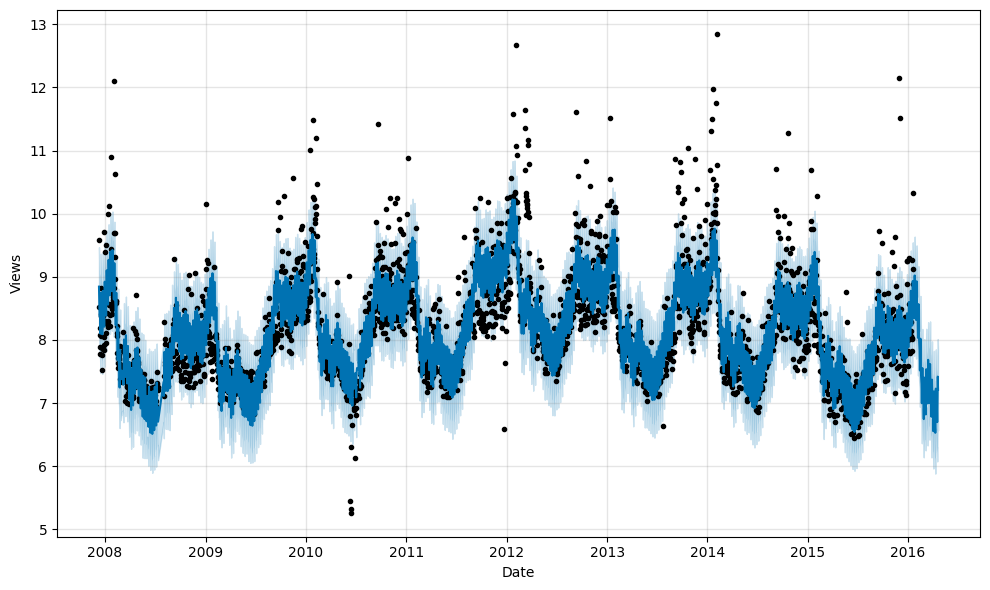

In [33]:
# Mostrando as previsões na imagem, pontinhos pretos são os valores reais

model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

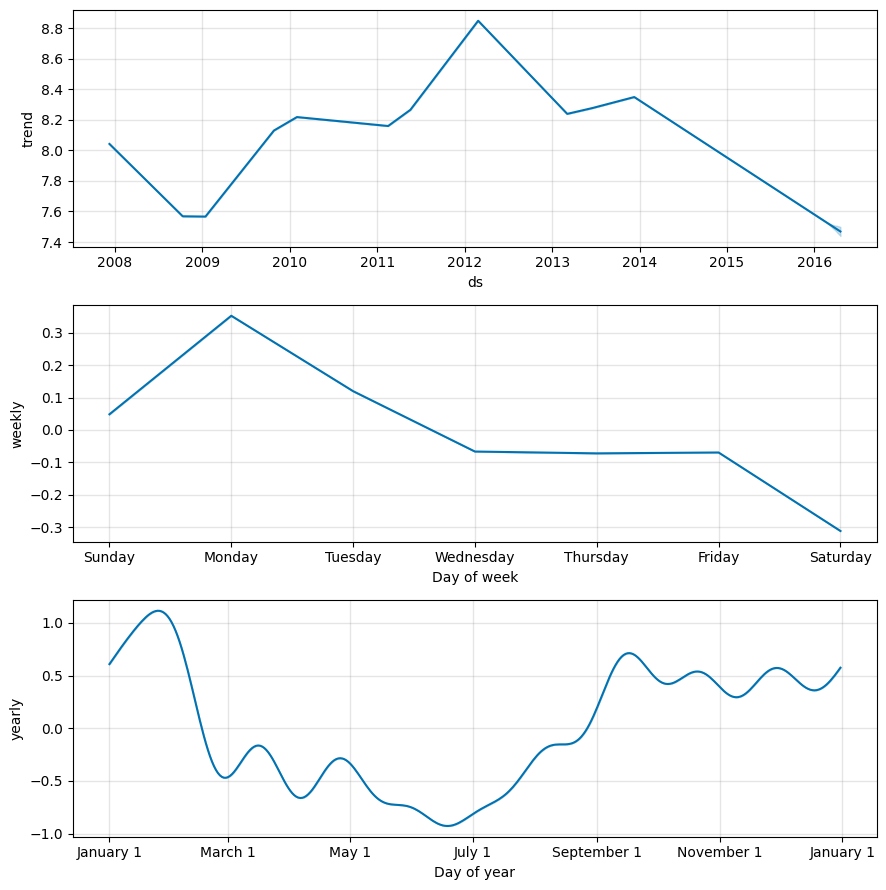

In [34]:
# Plotando componentes do algoritmo

model.plot_components(forecast);

In [35]:
from prophet.plot import plot_plotly, plot_components_plotly

In [36]:
# Grafico que mostras os valores reais e previstos

plot_plotly(model, forecast)

In [37]:
# Plotando os componentes da base original e prevista

plot_components_plotly(model, forecast)